## 作業

請閱讀以下相關文獻，並回答以下問題

[Linear Regression 詳細介紹](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5)

[Logistics Regression 詳細介紹](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5)

[你可能不知道的 Logisitc Regression](https://taweihuang.hpd.io/2017/12/22/logreg101/)


1. 線性回歸模型能夠準確預測非線性關係的資料集嗎?
> Yes, adding higher-degree polynomial terms (sklearn.preprocessing.PolynomialFeatures) to the dataset can facititate non-linear fitting with a linear model.

2. 回歸模型是否對資料分布有基本假設?
> No, but linear regression model assume the prediction errors are independent of each other and are normally distributed.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

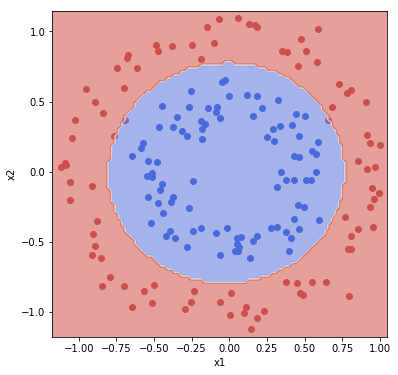

In [5]:
df = pd.read_csv('data/nonlinear.csv')

X = df.drop('y', axis=1).values
y = df['y']

# add second degree polynomials
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X_poly = poly.transform(X)

# fit model
lr = LogisticRegression(solver='liblinear')
lr.fit(X_poly, y)

# plot decision boundary
x1 = X[:, 0]
x2 = X[:, 1]
xxmin = min(x1.min() * 0.95, x1.min() * 1.05)
yymin = min(x2.min() * 0.95, x2.min() * 1.05)
xxmax = max(x1.max() * 0.95, x1.max() * 1.05)
yymax = max(x2.max() * 0.95, x2.max() * 1.05)

xx, yy = np.meshgrid(
    np.linspace(xxmin, xxmax, 100),
    np.linspace(yymin, yymax, 100)
)

zz = np.c_[xx.ravel(), yy.ravel()]
zz = poly.transform(zz)
zz = lr.predict(zz)

plt.figure(figsize=(6, 6))
mask = df['y'] == 0
plt.scatter(df[mask]['x1'], df[mask]['x2'], c='royalblue', label='0')
plt.scatter(df[~mask]['x1'], df[~mask]['x2'], c='indianred', label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.contourf(xx, yy, zz.reshape(xx.shape), cmap=plt.cm.coolwarm, alpha=0.5)